<h2><center> Elsabet Yemane Girma </center></h2>

<h2><center> Rossman Store Sales Focasting </center></h2>


 **Objective:** 

- Data Wrangling and Exploration (treat outliers, handle missing values etc.).
- Correlation analysis with Store dataset joined.
- Training Model  
- Visualize and evaluate model
- Choose the best performing one and predict the next 6 weeks of sales

train.csv 
test.csv
sample_submission.csv
store.csv,

The following dataset created by Rossman on its Store Sales and Information of its different drug stores:

<table>
<tr>
    <th><center>Columns</center></th>
    <th><center>Descriptions</center></th>
</tr>
<tr>
    <td><center>Id</center></td>
    <td><center> An Id that represents a (Store, Date) duple within the test set</center></td>
</tr>
<tr>
    <td><center>Store</center></td>
    <td><center>A unique Id for each store</center></td>
</tr>
<tr>
    <td><center>Sales</center></td>
    <td><center>The turnover on a given day (our target variable) </center></td>
</tr>
<tr>
    <td><center>Customers</center></td>
    <td><center>The number of customers on a given day</center></td>
</tr>
<tr>
    <td><center>Open</center></td> 
    <td><center>open: 0 = the store is closed , 1 = the store is open</center></td>
</tr>
<tr>
    <td><center>StateHoliday</center></td>
    <td><center>Indicates a state holiday. a = public holiday, b = Easter holiday, c = Christmas, 0 = None</center></td>
</tr>
<tr>
    <td><center>SchoolHoliday</center></td>
    <td><center> Store on this Date was affected or not by the closure of public schools</center></td>
</tr>
<tr>
    <td><center>StoreType</center></td>
    <td><center>4 different stores:a,b,c,d </center></td>
</tr>
<tr>
    <td><center>Assortment </center></td>
    <td><center>Assortment level: a = basic, b = extra, c = extended</center></td>
</tr>
<tr>
    <td><center>CompetitionDistance</center></td>
    <td><center>Distance in meters to the nearest competitor store</center></td>
</tr>
<tr>
    <td><center>CompetitionOpenSince[Month/Year]</center></td>
    <td><center>gives the approximate year and month of the time the nearest competitor was opened</center></td>
</tr>
<tr>
    <td><center>Promo</center></td>
    <td><center>Promo or not on that day</center></td>
</tr>
<tr>
    <td><center>Promo2</center></td>
    <td><center>Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating</center></td>
</tr>
<tr>
    <td><center>Promo2Since[Year/Week]</center></td>
    <td><center>describes the year and calendar week when the store started participating in Promo2</center></td>
</tr>
<tr>
    <td><center>PromoInterval</center></td>
    <td><center>describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store</center></td>
</tr>
</table>

**Approach:**

Having strong interest for Tree-Based models; this notebook is meant to show the performance of a robust ensemble methods ; Random Forest (parallel tree creation)  and evaluate the best performing one for this case.

I first do the habitual data treatment and cleansing.

In order to understand better the patterns of the data, i will make use of libraries like matplotlib and seaborn to deep dive cases in the dataset and give better visibility on what is happening with the different types of Rossman drug stores.

This Exploratory analysis will help me move forward with the correlation analysis and feature engineering part of the project.

Then i train my model using scikit-learn with Random Forest Regressor and evaluate it on a validation set in order to analyse and understand which model works best for this scenario. 



------------------------------------------------------------------------------------------

**Libraries to import:**

In [129]:

import warnings
warnings.filterwarnings("ignore")
#Data Manipulation and Treatment
import numpy as np
import pandas as pd
from datetime import datetime
#Plotting and Visualizations
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import itertools
#Scikit-Learn for Modeling;skclearn 
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [130]:

def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

**Load the datasets:**

In [131]:

df_train = pd.read_csv("../input/train.csv",sep=',', parse_dates=['Date']
                       , date_parser=str_to_date,
                       low_memory = False)



df_store = pd.read_csv("../input/store.csv"
                       , low_memory = False)

**A quick glimpse at the data on hand:**

In [132]:
df_train.head() 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_train.tail() 

In [133]:

df_train.dtypes,print ("The Train dataset has {} Rows and {} Variables".format(str(df_train.shape[0]),str(df_train.shape[1])))

The Train dataset has 1017209 Rows and 9 Variables


(Store                     int64
 DayOfWeek                 int64
 Date             datetime64[ns]
 Sales                     int64
 Customers                 int64
 Open                      int64
 Promo                     int64
 StateHoliday             object
 SchoolHoliday             int64
 dtype: object, None)

In [134]:

df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [135]:

df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [136]:

df_store.dtypes ,print ("The Store dataset has {} Rows (which means unique Shops) and {} Variables".format(str(df_store.shape[0]),str(df_store.shape[1]))) 



The Store dataset has 1115 Rows (which means unique Shops) and 10 Variables


(Store                          int64
 StoreType                     object
 Assortment                    object
 CompetitionDistance          float64
 CompetitionOpenSinceMonth    float64
 CompetitionOpenSinceYear     float64
 Promo2                         int64
 Promo2SinceWeek              float64
 Promo2SinceYear              float64
 PromoInterval                 object
 dtype: object, None)

<h2>Data Wrangling and Exploration:</h2>

How many missing fields each variable has:

In [137]:

df_train.count(0)/df_train.shape[0] * 100

Store            100.0
DayOfWeek        100.0
Date             100.0
Sales            100.0
Customers        100.0
Open             100.0
Promo            100.0
StateHoliday     100.0
SchoolHoliday    100.0
dtype: float64

- We can see that the the columns have got a good fill rate. We don't need to do any change for the train set for now at least.

<h3>A closer look at the Train set:</h3>

<h4>Deep Dive on Stores Closed (which means 0 customers and 0 sales) on Certain days:</h4>

In [138]:
print ()
print ("-Over those two years, {} is the number of times that different stores closed on given days.".format(df_train[(df_train.Open == 0)].count()[0]))
print ()
print ("-From those closed events, {} times occured because there was a school holiday. " .format(df_train[(df_train.Open == 0) & (df_train.SchoolHoliday == 1)&(df_train.StateHoliday == '0') ].count()[0]))
print ()
print ("-And {} times it occured because of either a bank holiday or easter or christmas.".format(df_train[(df_train.Open == 0) &
         ((df_train.StateHoliday == 'a') |
          (df_train.StateHoliday == 'b') | 
          (df_train.StateHoliday == 'c'))].count()[0]))
print ()
print ("-But interestingly enough, {} times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.".format(df_train[(df_train.Open == 0) &
         (df_train.StateHoliday == "0")
         &(df_train.SchoolHoliday == 0)].count()[0]))
print ()


-Over those two years, 172817 is the number of times that different stores closed on given days.

-From those closed events, 3067 times occured because there was a school holiday. 

-And 30140 times it occured because of either a bank holiday or easter or christmas.

-But interestingly enough, 139610 times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.



<h4>What should be done?</h4>

- After reading the descrition of the this task, Rossman clearly stated that they were undergoing refurbishments sometimes and had to close. Most probably those were the times this event was happening.

- And since we don't want to bias our decision tree models to consider those exceptions, the best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance.

- In this case we will analyse only open stores since a close  store yield a profit of 0.

In [139]:
df_train=df_train.drop(df_train[(df_train.Open == 0) & (df_train.Sales == 0)].index)

In [140]:

df_train = df_train.reset_index(drop=True) #making sure the indexes are back to [0,1,2,3 etc.] 

In [141]:
print ("Our new training set has now {} rows ".format(df_train.shape[0]))

Our new training set has now 844392 rows 


**What about the distribution of Sales and Customers in the train set? Any outliers?**

**1) Sales:**

In [142]:
df_train.Sales.describe() 
#we see here a minimum of 0 which means some stores even opened got 0 sales on some days.

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [143]:

df_train=df_train.drop(df_train[(df_train.Open == 1) & (df_train.Sales == 0)].index)
df_train = df_train.reset_index(drop=True) 

{'Mean': 6955.959133664481, 'Median': 6369.0}

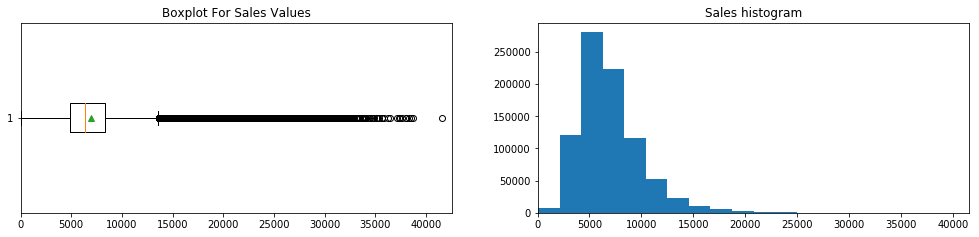

In [144]:

fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Sales, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Sales"]+1000))
axes[0].set_title('Boxplot For Sales Values')
axes[1].hist(df_train.Sales, cumulative=False, bins=20)
axes[1].set_title("Sales histogram")
axes[1].set_xlim((min(df_train.Sales), max(df_train.Sales)))

{"Mean":np.mean(df_train.Sales),"Median":np.median(df_train.Sales)}




In [145]:
print ("{0:.2f}% of the time Rossman are actually having big sales day (considered outliers).".format(df_train[df_train.Sales>14000].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no sales at all.".format(df_train[df_train.Sales==0].count()[0]/df_train.shape[0]*100))

3.21% of the time Rossman are actually having big sales day (considered outliers).
0.00% of the time Rossman are actually having no sales at all.


**Findings:**

- Some exceptions (the outliers) in the boxplot had to be checked to see if it's wrong inputted data but it turns out this big amount of sales on certain days is explained by either promotional purposes,the type of the store being big and popular or just not having near enough competition and being the monopoly in its region. (Charts will come in the analysis section of the train and store dataset when merged).

- Concerning the 0 of the time having 0 sales.it represented before removing them a tiny amount of the train set(0.01%), those values can affect further calculation of metrics and bias and are not to be taken into account. Those cases could happen for some shops, probably due to external events affecting it.( an incident, a manifestation etc.)

- An important metric to always check when looking at a distribution is how the mean compares to the median and how close are they from each other. As we see here a mean of 6955 versus 6369 in median is a very good sign that there are no extravagant values affecting the general distribution of Sales.

In [147]:
df_train.Customers.describe()    

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

{'Mean': 762.777166253325, 'Median': 676.0}

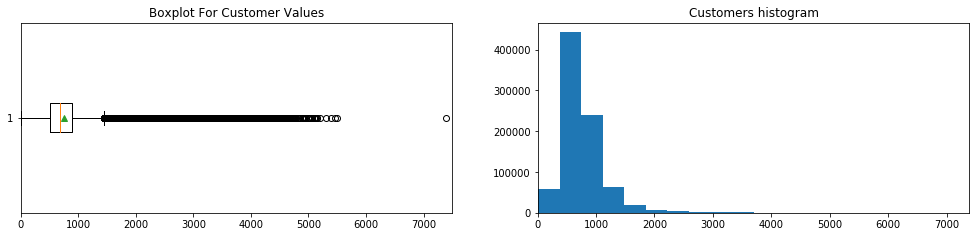

In [148]:

fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_train.Customers, showmeans=True,vert=False)
axes[0].set_xlim(0,max(df_train["Customers"]+100))
axes[0].set_title('Boxplot For Customer Values')
axes[1].hist(df_train.Customers, cumulative=False, bins=20)
axes[1].set_title("Customers histogram")
axes[1].set_xlim((min(df_train.Customers), max(df_train.Customers)))

{"Mean":np.mean(df_train.Customers),"Median":np.median(df_train.Customers)}

In [149]:
print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(df_train[df_train.Customers>1500].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(df_train[df_train.Customers==0].count()[0]/df_train.shape[0]*100))

4.37% of the time Rossman are actually having customers more than usual (considered outliers).
0.00% of the time Rossman are actually having no customers at all.


In [150]:

df_train[df_train.Customers>7000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
825160,817,2,2013-01-22,27190,7388,1,1,0,0


In [151]:
stats.pearsonr(df_train.Customers, df_train.Sales)[0]

0.82355172020002143

**Findings:**

- We can see similair patterns with the customers column and the Sales column, in fact our pearson correlation factor of 0.82 explains that there is a strong positive correlation between Sales and Customers. In general, the more customers you have in a store, the higher your sales for the day.

- We see that on a specific day there was a huge amount of customers in a store,this was due to a big promotion going on. Those specific values are affecting the mean which concludes the difference between a mean of 762 and a median of 676.

- We observe a right skewness in both distributions because of the low number of outliers but the high representation of each outlier alone which pushes the distribution to the lefta as seen in both histograms.This typically occurs when the mean is higher than the median.


<h3>A closer look at the Store Dataset:</h3>

In [152]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

**Findings:**

- The `Promo2SinceWeek`,`Promo2SinceYear` and `PromoInterval` variables has 51% fill rate since they are actually NULL values because there are no continuous promotion for those stores. 

- Instead for `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`, it's basically missing data that we're dealing with here (68.25% fill rate), this means that we have the nearest distance of the competitor but miss the date information on when did he actually opened next to the Rossman store.

**Let's start the cleansing process by order:**

1) `CompetitionDistance`:

In [153]:
df_store[pd.isnull(df_store.CompetitionDistance)] 
#rows with missing values for Competition Distance, only 3 rows with null which makes sense since 99.73% is filled

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


- Before deciding how to treat this,we know there are infinite ways of filling missing values.
- The most common and simplistic approach is to fill it with either the mean or the median of this variable.
- Let's quickly have a look at those metrics.

{'Mean': 5404.9010791366909,
 'Median': 2325.0,
 'Standard Dev': 7659.7282732764415}

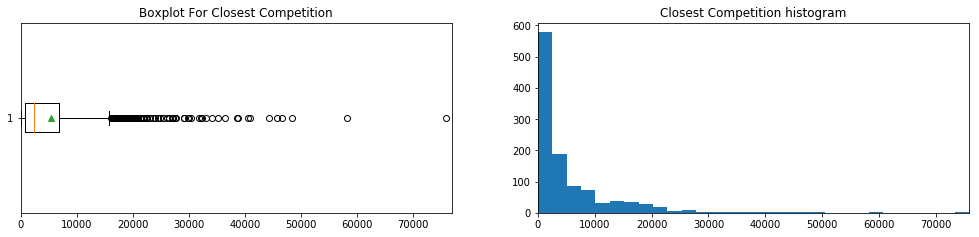

In [154]:
df_store_check_distribution=df_store.drop(df_store[pd.isnull(df_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(df_store.CompetitionDistance),"Median":np.nanmedian(df_store.CompetitionDistance),"Standard Dev":np.nanstd(df_store.CompetitionDistance)}#That's what i thought, very different values, let's see why 

We see a highly right skewed distribution for this variable with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7659, higher than the mean and the median.

**Solution:**

- It is realistically better to input the median value to the three Nan stores then the mean since the mean is biased by those outliers.

实际上，最好将中值输入到三个 Nan 存储中，然后输入平均值，因为均值会受到这些异常值的影响

In [155]:

df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

2) `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`?

- Since we have no information whatsoever on those missing values and no accurate way of filling those values.
- A creative way could be to apply a multilabel classification algorithm and train on the non Nan fields and then predict what could be most probably the month and year for those fields. But this approach is computationally too long.
- So for this purpose those fields are going to be assigned to 0 .


In [156]:
df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
df_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

3) `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval` ?

**Findings:**
- This case is pretty straighforward, all the missing values comes from fields where `Promo2`=0 which means there are no continuous promotional activities for those stores.
- Having no promotion means those fields have to be 0 as well since they are linked to Promo2.

In [157]:
df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)

In [158]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

Now that we are done with clearing missing values, let's merge the two datasets.

In [159]:
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_train_store.head() 
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(df_train_store.shape[0]),str(df_train_store.shape[1]))) 


The Train_Store dataset has 844338 Rows and 18 Variables


<h3>Store Type Analysis:</h3>

The best way to asses the performance of a store type is to see what is the sales per customer so that we normalize everything and we get the store that makes its customers spend the most on average.


Let's compare first the total sales of each store type, its average sales and then see how it changes when we add the customers to the equation:

In [160]:
df_train_store['SalesperCustomer']=df_train_store['Sales']/df_train_store['Customers']

In [161]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


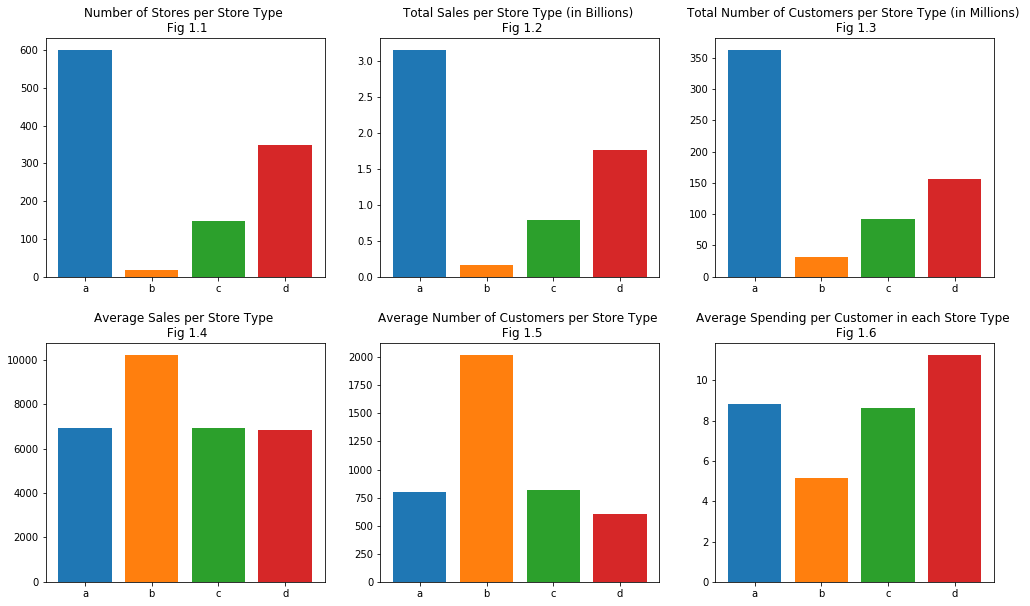

In [162]:

fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))

plt.subplots_adjust(hspace = 0.28)

#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(df_store.groupby(by="StoreType").count().Store.index,df_store.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

**Findings:**
- From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

- When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers. One assumption could be that if B has only 17 stores but such a high amount of average sales and customers that it is likely hyper Rossman branches whereas A would be smaller in size but much more present.

- Surprisingly it is StoreType D who has the highest average spending per Customer, this is probably explained by an average competition distance higher than ther rest which means each customer will buy more since he knows there isn't a lot of similair shops around.

- What would help us understand better what's happening is to look for other variables explaining this behaviour like Assortments, Comeptition and Promotions.

<h3>Assortments:</h3>

As we cited in the description, assortments have three types and each store has a defined type and assortment type: 
- `a` means basic things
- `b` means extra things
- `c` means extended things so the highest variety of products.

What could be interesting is to see the relationship between a store type and its respective assortment type.

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

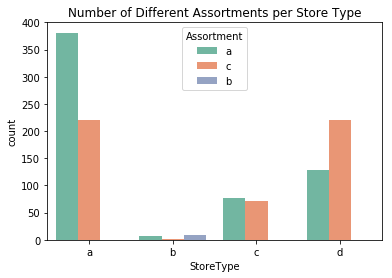

In [163]:

# x: Bar chart on the x-axis, counting statistics divided by x labels.
# hue: While dividing by x or y labels, also count statistics divided by hue labels.
# data: Dataset for plotting, which can be a DataFrame, array, or list of arrays. If x or y is missing, the data parameter specifies the dataset, and either x or y must be present; at least one must be provided.
# order and hue_order: Used for sorting fields in x or y, and for sorting fields in hue, respectively. The sorting method is a list.
# palette: Use different color palettes.

StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=df_store,palette=sns.color_palette("Set2", n_colors=3)).set_title("Number of Different Assortments per Store Type")
df_store.groupby(by=["StoreType","Assortment"]).Assortment.count()



**Findings:**
- We can clearly see here that most of the stores have either `a` assortment type or `c` assortment type.
- Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly `c` assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.
- Another important factor here is the fact that store type b is the only one who has the b assortment type and a lot of them actually which stands for "extra" and by looking at fig 1.4 and 1.5 he's the one who has the highest number of customers and sales. Probably this formula of extra is the right middlepoint for customers between not too much variety like C assortment and not too basic like A assortment and this is what is driving the high traffic in this store.

**Promotion:**

Let's see how Promotion affect the overall sales of Rossman by looking at when there is and when there isn't promotion over those 3 years. This allow us first to see the impact of promotion and as well to see the evolution of sales over specific years (so trends in a given year) and the gradual increase in sales from 2013 to 2015:

In [164]:
# dt.year、dt.month、dt.day
df_train_store['Month']=df_train_store.Date.dt.month
df_train_store['Year']=df_train_store.Date.dt.year

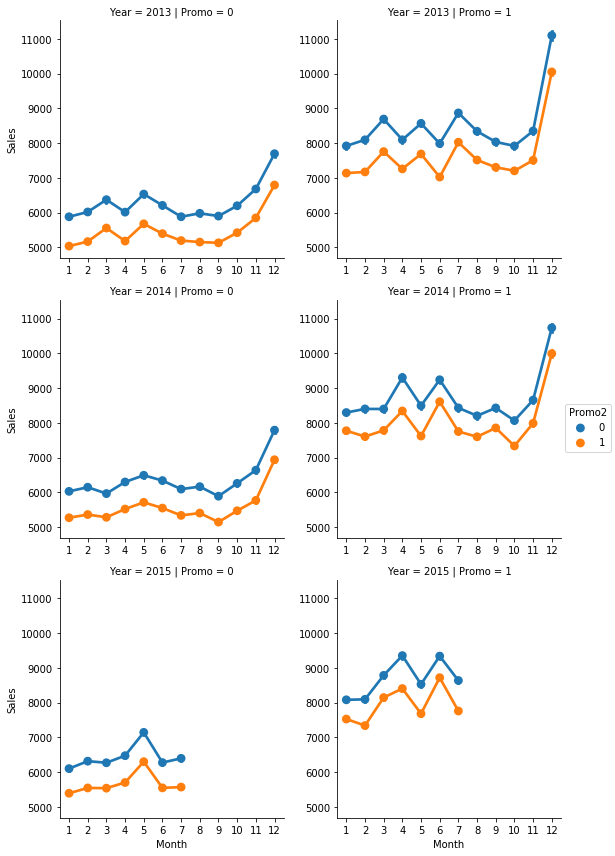

In [165]:

# sns.factorplot draws a two-dimensional variable relationship plot
# x, y: This parameter takes the names of variables from the data, which are used as input for plotting long-form data.
# row, col (facet parameters): (optional) This parameter takes the names of variables from the data, which will determine the facets of the grid.
# hue: Classifying parameter (optional) This parameter takes column names for color coding.
sns.factorplot(data = df_train_store, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)


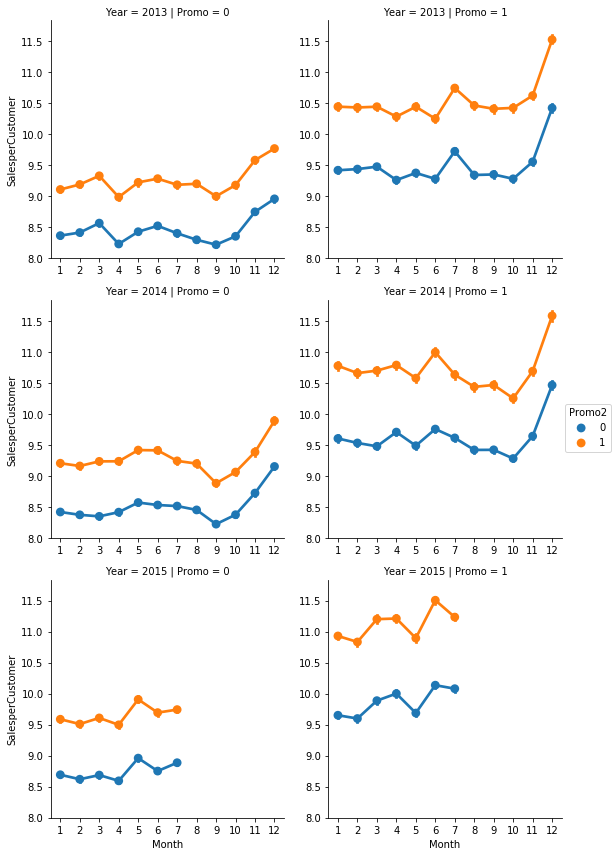

In [166]:
sns.factorplot(data = df_train_store, x ="Month", y = "SalesperCustomer", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

**Findings:**
- We see the dramatic change when we compare having promotion `Promo`=1 to not having promotion `Promo`=0 and can conclude that a store that have promotion on a given day changes its amount of sales considerably.
- But Surprisingly, when we check more granularly at the `Promo2` variable (indicating a contunious promotion blue vs orange) we see that in general when there is no consecutive promotion stores tend to sell more then with consecutive promotion. This is probably a solution they're putting in place to treat stores with very low sales in the first place. And indeed when checking the Sales per Customer over promotion we understand that initially those stores suffer from low sales and those continuous promotion shows a tremending increase in the buying power of customers.
- If we look over the years,there is a slight increase Year over Year but we don't see any major change from 2013 to 2015 and we actually see a very similair pattern in the months over the years with major spikes first around Easter period in March and April then in Summer in May,June and July and then finally around the Christmas period in November and December.

What if we go more granular to look at days in a week for promotion impact?

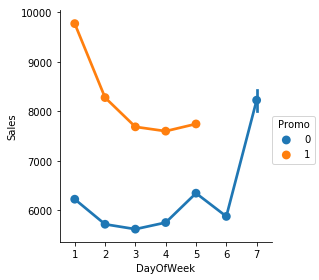

In [167]:
sns.factorplot(data = df_train_store, x ="DayOfWeek", y = "Sales",
                hue='Promo'
              ,sharex=False)

In [168]:

print ("Number of Stores opened on Sundays:{}" .format(df_train_store[(df_train_store.Open == 1) & (df_train_store.DayOfWeek == 7)]['Store'].unique().shape[0]))

Number of Stores opened on Sundays:33


**Findings:**
- We see already a big difference again even on a week level (from Monday to Friday) when we seperate promotion and no promotion.We see there are no promotions during the weekend.

- For Sunday to have such a high peak is understandable, since a very few stores opens on Sundays (only 33);if anyone needs anything urgently and don't have the time to get it during the week, he will have to do some distance to get to the open ones even if it's not close to his house. This means that those 33 open stores on Sunday actually accounts for the potential demand if all Rossman Stores were closed on Sundays. This clearly shows us how important it is for stores to be opened on Sundays.

- After attempting to look at Sales behaviour in a week over the Years and over the months, i concluded that the pattern doesn't change, which means all the time there is a peak on Mondays with promotions, a tiny peak on Friday before the weekend and a big peak on Sunday because of closed stores.

**Competition Distance:**

What i find also interesting to plot is the effect of the closest competition distance on Sales, to see whether the one with very far competition actually make more sales then the one with close competition.

Since `CompetitionDistance` is a continuous variable, we need to first convert it into a categorical variable with 5 different bins (i chose this number by looking at the distribution and to keep aesthetic).

In [169]:

df_train_store['CompetitionDist_Cat']=pd.cut(df_train_store['CompetitionDistance'], 5)

In [170]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Month,Year,CompetitionDist_Cat
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883,7,2015,"(-55.84, 15188.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2015,"(-55.84, 15188.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,7,2015,"(-55.84, 15188.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457,7,2015,"(-55.84, 15188.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118,7,2015,"(15188.0, 30356.0]"


In [171]:

df_train_store.groupby(by="CompetitionDist_Cat").Sales.mean(),df_train_store.groupby(by="CompetitionDist_Cat").Customers.mean()

(CompetitionDist_Cat
 (-55.84, 15188.0]     6957.360876
 (15188.0, 30356.0]    7041.604692
 (30356.0, 45524.0]    6471.923562
 (45524.0, 60692.0]    5980.114445
 (60692.0, 75860.0]    7775.446449
 Name: Sales, dtype: float64, CompetitionDist_Cat
 (-55.84, 15188.0]     771.345223
 (15188.0, 30356.0]    691.574605
 (30356.0, 45524.0]    680.101854
 (45524.0, 60692.0]    643.988246
 (60692.0, 75860.0]    914.574972
 Name: Customers, dtype: float64)

**Findings:**
- As we can see here, like i thought, the stores that are the furthest have the highest average sales and number of customers.
- This doesn't mean automatically that the furthest the better, but it does shed light on the fact that when there are no competition nearby, stores tend to sell more and have more customers because there are almost a monopoly in this region. We could think of it as McDonalds on highways where there are no other restaurants around, people who are hungry are forced to go there to eat.

<h2>Preliminary Step for Correlation Analysis:</h2>

Since we need numerical variables for both our correlation Analysis and to feed the decision tree based models, we need to transform what is not numerical to a numerical representation while keeping the logic behind it present.

Since we used `CompetitionDist_Cat` just to show the variation of the variable `CompetitionDistance` we can go ahead and remove it now.

In [172]:

del df_train_store["CompetitionDist_Cat"]

Let's get Days from Date and delete Date since we already have its Year and Month:

In [173]:

df_train_store['Day']=df_train_store.Date.dt.day

In [174]:

del df_train_store["Date"]

We still have StoreType,Assortment and StateHoliday as Obejcts we need to convert them to numerical categories:

But first we need to make sure we don't have Nan before doing those transformations otherwise Nan will be equal to -1

In [175]:

df_train_store['StoreType'].isnull().any(),df_train_store['Assortment'].isnull().any(),df_train_store['StateHoliday'].isnull().any()
#No Null values we can proceed with the transformation

(False, False, False)

In [176]:

df_train_store["StoreType"].value_counts(),df_train_store["Assortment"].value_counts(),df_train_store["StateHoliday"].value_counts()

(a    457042
 d    258768
 c    112968
 b     15560
 Name: StoreType, dtype: int64, a    444875
 c    391254
 b      8209
 Name: Assortment, dtype: int64, 0    843428
 a       694
 b       145
 c        71
 Name: StateHoliday, dtype: int64)

In [184]:

df_train_store['StateHoliday'] = df_train_store['StateHoliday'].astype('category')
df_train_store['Assortment'] = df_train_store['Assortment'].astype('category')
df_train_store['StoreType'] = df_train_store['StoreType'].astype('category')
df_train_store['PromoInterval']= df_train_store['PromoInterval'].astype('category')

In [185]:

df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday'].cat.codes
df_train_store['Assortment_cat'] = df_train_store['Assortment'].cat.codes
df_train_store['StoreType_cat'] = df_train_store['StoreType'].cat.codes
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval'].cat.codes



In [186]:

df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday_cat'].astype('float')
df_train_store['Assortment_cat'] = df_train_store['Assortment_cat'].astype('float')
df_train_store['StoreType_cat'] = df_train_store['StoreType_cat'].astype('float')
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval_cat'].astype('float')

Since associating 0,1,2,3 to categorical variables like StoreType,Assortment,StateHoliday affect the bias of the algorithm (0 would account less then 3 when actually StoreType a and StoreType c should be treated equally).
I will just convert it to categorical now for the purpose of the correlation analysis and then use the get_dummies function to encode them binarly.

In [181]:
df_train_store.dtypes

Store                           int64
DayOfWeek                       int64
Sales                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                     int8
SchoolHoliday                   int64
StoreType                        int8
Assortment                       int8
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
SalesperCustomer              float64
Month                           int64
Year                            int64
Day                             int64
StateHoliday_cat              float64
Assortment_cat                float64
StoreType_cat                 float64
PromoInterval_cat             float64
dtype: object

<h3>Correlation Analysis:</h3>

In [189]:
df_correlation=df_train_store[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'Day', 'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat',
       'PromoInterval_cat']]

In [190]:

df_correlation=df_correlation.drop('Open', axis = 1)

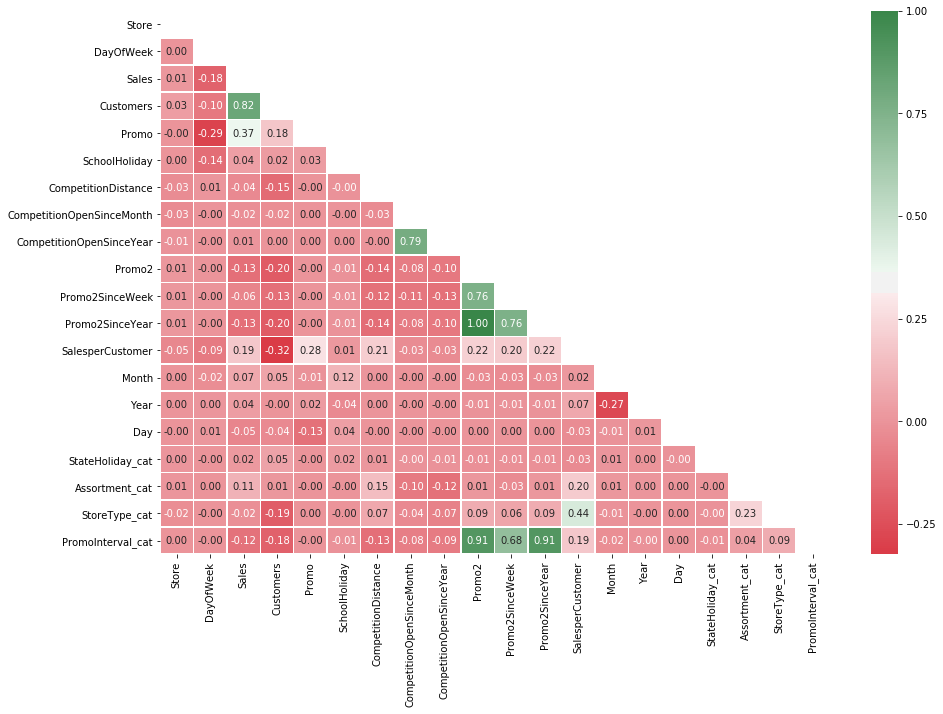

In [191]:

upper_triangle = np.zeros_like(df_correlation.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))

**Interpretation:**
- We can first see the 0.82 between Customers and sales which suggests that they are positively correlated like we stated above in the analysis.
- It's interesting to see that Sales per Customer and Promo (0.28) actually correlate positively, since running a promotion increases that number .
- Sales per Customer also correlates with Competition Distance(0.21), in a positive manner, like i said up the higher the competitionn distance the more sales per customer we do, which makes sense , the further our competition, the more monopolization Rossman can achieve in the region.
- Additionally, the effect of promo2 to Sales per Customer like we said above as well(0.22), it  did provoke a change in the buying pattern and increased it when continuous promotion were applied.
- Finally, we can see that StoreType does play a major role with Sales per Customer (0.44), this is probably due to my encoding of the store type variable which suggests that the high categories like d which is equal 4 has higher weight, but if not then it makes sense that the last categories like d does explain the increase in Sales per Customer like fig 1.6 shows.

<h3>Conclusion of Exploratory Analysis:</h3>

At this stage, we got a solid understanding of the distributions, the statistical properties and the relationships of our variables.
The next step is to identify what variables to feed XGboost and Random Forest for training and to work on the modeling part of the project

<h2>Training with RandomForest Regressor:</h2>

**Definition:**

- RandomForest is a machine learning alogrithm used for classification and regression that is bestly used with structured and tabular data.

**Its advantages:**
    
- Random forest runtimes are quite fast, and they are able to deal with unbalanced and missing data.
- The process of averaging or combining the results of different decision trees helps to overcome the problem of overfitting.
- They also do not require preparation of the input data. You do not have to scale the data.

**Its Disadvantages:**
- The main drawback of Random Forests is the model size. You could easily end up with a forest that takes hundreds of megabytes of memory and is slow to evaluate.
- They get a bit harder to interpret than regular deicison trees, since we are constructing of forest of more than 50 decision trees and more using grid search.


**Further Feature Engineering before Training:**

-Since the competition variables `CompetitionOpenSinceYear` and `CompeitionOpenSinceMonth` have the same underlying meaning, merging them into one variable that we call `CompetitionOpenSince` makes easier for the algorithm to understand the pattern and creates less branches and thus complex trees.

In [192]:
df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'SalesperCustomer', 'Month', 'Year',
       'Day', 'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat',
       'PromoInterval_cat'],
      dtype='object')

-The `StateHoliday` is not very important to distinguish (what type of holiday) and can be merged in a binary variable called `is_holiday_state`.

In [204]:

df_train_store["is_holiday_state"] = df_train_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})

-I think it's always better when working with decision tree based models to have dummy variables instead of categorical with different levels, because this alters the bias of the algorithm who will favor a higher weight to the categories like 4 and deprioritize levels like 1. And this problem could rise in the variables `Assortment` and `StoreType` and `PromoInterval`.
So far those are the codes we have for each variable:

-That's why i use the get_dummies function to instead do a binary encoding and prevent this.

In [200]:

df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'SalesperCustomer', 'Month',
       'Year', 'Day', 'CompetitionOpenSince', 'is_holiday_state',
       'is_Assortment_0', 'is_Assortment_1', 'is_Assortment_2',
       'is_StoreType_0', 'is_StoreType_1', 'is_StoreType_2', 'is_StoreType_3',
       'is_PromoInteval_0', 'is_PromoInteval_Feb,May,Aug,Nov',
       'is_PromoInteval_Jan,Apr,Jul,Oct', 'is_PromoInteval_Mar,Jun,Sept,Dec'],
      dtype='object')

- The Train set is ready to be fed to the RandomForest Algorithm.
- Let's do the same transformation for the test set now.

<h3>Test Set Adaptation:</h3>

In [207]:

df_test = pd.read_csv("../input/test.csv",sep=',', parse_dates=['Date']
                       , date_parser=str_to_date,
                       low_memory = False)
print ("The Test dataset has {} Rows and {} Variables".format(str(df_test.shape[0]),str(df_test.shape[1])))

The Test dataset has 41088 Rows and 8 Variables


In [208]:

df_test.fillna(1, inplace = True) #11rows with Nans decided to leave them open since its one store 622 which is 
#usually open
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_test_store = pd.merge(df_test, df_store, how = 'left', on = 'Store')
print ("The Test_Store dataset has {} Rows and {} Variables".format(str(df_test_store.shape[0]),str(df_test_store.shape[1]))) 
df_test_store['Month']=df_test_store.Date.dt.month
df_test_store['Year']=df_test_store.Date.dt.year
df_test_store['Day']=df_test_store.Date.dt.day

df_test_store['StateHoliday'] = df_test_store['StateHoliday'].astype('category')
df_test_store['Assortment'] = df_test_store['Assortment'].astype('category')
df_test_store['StoreType'] = df_test_store['StoreType'].astype('category')
df_test_store['PromoInterval']= df_test_store['PromoInterval'].astype('category')
df_test_store['StateHoliday_cat'] = df_test_store['StateHoliday'].cat.codes
df_test_store['Assortment_cat'] = df_test_store['Assortment'].cat.codes
df_test_store['StoreType_cat'] = df_test_store['StoreType'].cat.codes
df_test_store['PromoInterval_cat'] = df_test_store['PromoInterval'].cat.codes
df_test_store['StateHoliday_cat'] = df_test_store['StateHoliday_cat'].astype('float')
df_test_store['Assortment_cat'] = df_test_store['Assortment_cat'].astype('float')
df_test_store['StoreType_cat'] = df_test_store['StoreType_cat'].astype('float')
df_test_store['PromoInterval_cat'] = df_test_store['PromoInterval_cat'].astype('float')
df_test_store['CompetitionOpenSince'] = np.where((df_test_store['CompetitionOpenSinceMonth']==0) & (df_test_store['CompetitionOpenSinceYear']==0) , 0,(df_test_store.Month - df_test_store.CompetitionOpenSinceMonth) + 
                                       (12 * (df_test_store.Year - df_test_store.CompetitionOpenSinceYear)) )



df_test_store["is_holiday_state"] = df_test_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})




df_test_store=pd.get_dummies(df_test_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])


The Test_Store dataset has 41088 Rows and 17 Variables


In [209]:
del df_test_store["Date"]
del df_test_store['CompetitionOpenSinceYear']
del df_test_store['CompetitionOpenSinceMonth']


In [210]:
del df_test_store['StateHoliday_cat']

In [211]:
del df_test_store['Assortment_cat']
del df_test_store['StoreType_cat']
del df_test_store['PromoInterval_cat']

In [212]:
del df_test_store['StateHoliday']

In [213]:
del df_train_store['StateHoliday']

**Findings:**
- Our top 5 most important variables are:

 1-Competitor Distance: This indeed impacts a lot the sales of a store like we saw previously in our EDA,when competition is very far stores tend to sell a lot more.
 
 2-Promo: Promotion is primordial for a store to increase its sales, it allows price breaking and thus more customers intersted in buying.
 
 3-Store: The Store itself represents a unique identificator for the algorithm to recognise which store has what attributes and indeed better accounts for the forecasting of those same stores in a future timeline.
 
 4-CompetitionOpenSince: The merging of this variable paid out and allowed us to give more accurate predicitions of the sales based on the time of opening of those competitors.
 
 5-DayofWeek: Like we said, during a week , the pattern varies a lot if it's a sunday or a monday (like we saw in our EDA) for instance and each day in the week has his own attributes and properties that allow to know how much are we going to sell.
